# Orientation Analysis

## Mesogens with NP | Pressure Ramps

### System P = 1.8, Expected value of $T_c$ : 7.09

In [2]:
#-----Import packages.

import gsd
import gsd.hoomd
import matplotlib.pyplot as plt
import numpy as np
import orientation_analysis as oas
import seaborn as sns; 
sns.set_style('whitegrid')

## Visualize one curve

In [3]:
#-----Define variables

temp = 7.3; 
press = 1.8;

In [4]:
#-----Declare the file from wich we'll extract the configuration of the system.

ramp_file = "T_" + str(temp) + "_P_" + str(press) + "_equilibrium.gsd"

In [5]:
t1 = gsd.hoomd.open(ramp_file, 'rb')

In [6]:
s1 = oas.sList(t1)

In [7]:
mean_s = np.mean(s1);
std_s = np.std(s1);
print("S =", mean_s,"+-",std_s)

S = 0.4049742797523878 +- 0.13489036475549732


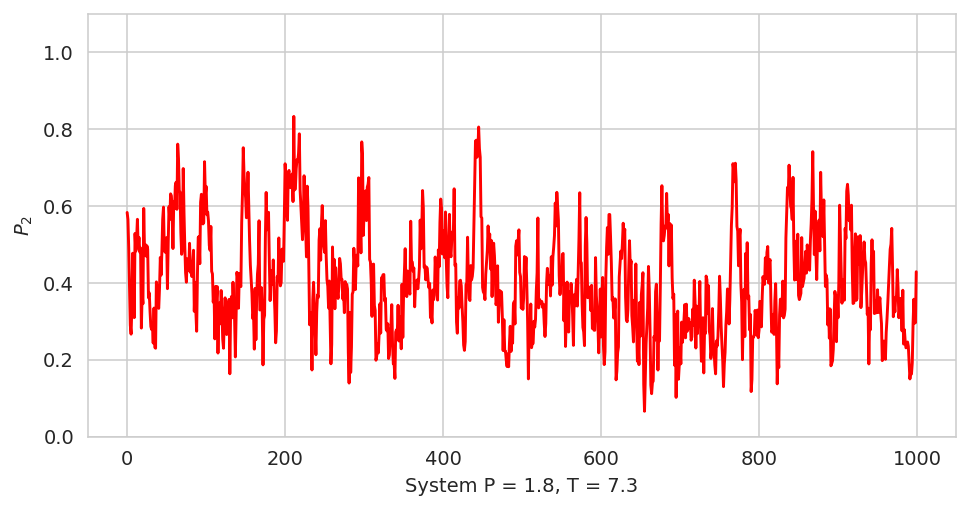

In [8]:
plt.figure(figsize=(8,4), dpi=140);
plt.plot(np.arange(len(s1)), s1, 'r');

plt.xlabel('System ' + 'P = ' + str(press) + ', T = ' + str(temp));
plt.ylabel('$P_{2}$');
plt.ylim((0,1.1))

plt.show()

## Transition Curve

In [9]:
p2 = []
p2_std = []
temperature = []

for i in range(9):
    temp = 6.0 + 0.2*i
    temperature.append(temp)
    press = 1.8
    file = "T_" + str(temp) + "_P_" + str(press) + "_equilibrium.gsd"
    t = gsd.hoomd.open(file, 'rb')
    s = oas.sList(t)
    mean_p2 = np.mean(s)
    std_p2 = np.std(s) / np.sqrt(1000)
    p2.append(mean_p2)
    p2_std.append(std_p2)

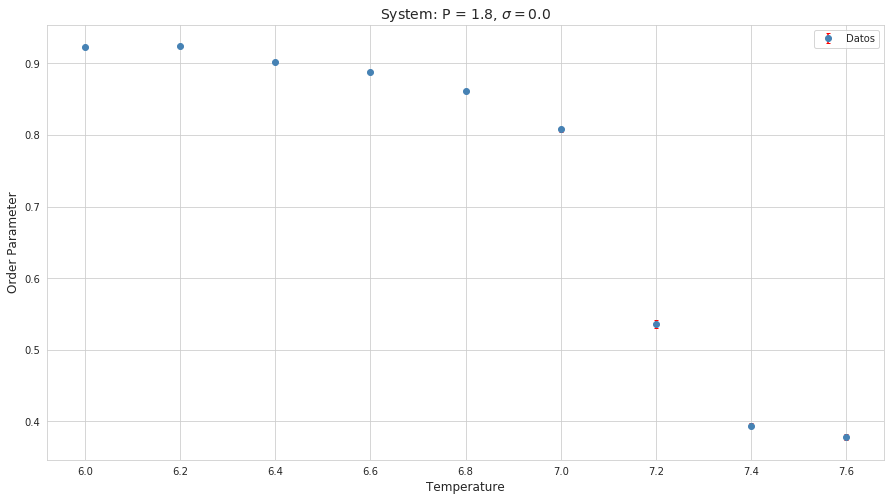

In [10]:
# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting the error bars
ax.errorbar(temperature, p2, yerr = p2_std, label = 'Datos',fmt='o', ecolor='red',
            color='steelblue', capsize=2)

# Adding a Plot
#ax.plot(t, p_2_pure, label='Ajuste', color = 'green');

# Adding plotting parameters
ax.set_title('System: P = 1.8, $\sigma = 0.0 $ ', fontsize=14)
ax.set_xlabel('Temperature', fontsize=12);
ax.set_ylabel('Order Parameter', fontsize=12);
ax.legend();
fig.savefig("Pure_system.png",dpi = 200, format = "png")

In [11]:
temperature

[6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6]

In [12]:
p2

[0.9222003556478635,
 0.9248159435039675,
 0.9017202226163006,
 0.8885361873505427,
 0.8615701775451134,
 0.8081115177787658,
 0.5360653275911457,
 0.39436267313028567,
 0.3779839982619986]